In [33]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.collections import LineCollection
import pandas as pd
import os

In [34]:
plotting.setup_mpl()

In [35]:
ff1.Cache.enable_cache('cache/') 

In [36]:
year = 2021
track = 'FRANCE'
session = 'Q'

In [37]:
session = ff1.get_session(2021, 'FRANCE', 'Q')
weekend = session.event
session.load()

core           INFO 	Loading data for French Grand Prix - Qualifying [v2.2.9]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
/Users/davidshortland/Library/Python/3.8/lib/python/site-packages/fastf1/core.py:1310: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_last).reset_index(drop=True)
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '44', '7

In [38]:
lap = session.laps.pick_fastest()

# Calculate better formatted time
days = lap.LapTime.days
hours, remainder = divmod(lap.LapTime.seconds, 3600)
minutes, seconds = divmod(remainder, 60)
seconds += lap.LapTime.microseconds / 1e6

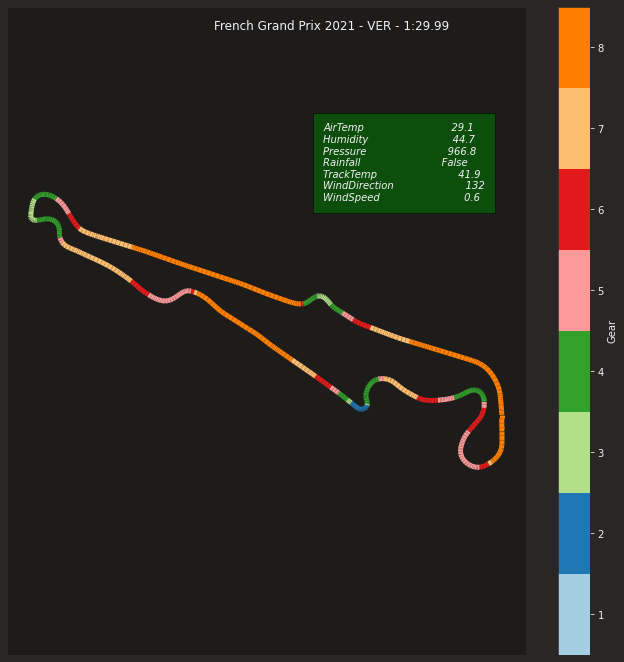

In [39]:
# A function that is used to plot the fastest lap of the race
tel = lap.get_telemetry()
x = np.array(tel['X'].values)
y = np.array(tel['Y'].values)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
gear = tel['nGear'].to_numpy().astype(float)
cmap = plt.get_cmap('Paired')
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N + 1), cmap=cmap)
lc_comp.set_array(gear)
lc_comp.set_linewidth(5)
plt.figure(figsize=(9, 9))
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
cbar = plt.colorbar(mappable=lc_comp, label="Gear", boundaries=np.arange(1, 10))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(np.arange(1, 9))
plt.suptitle(f'{weekend.EventName} 2021 - {lap.Driver} - {minutes}:{seconds}')
plt.text(2000, 5000, "\n".join(str(lap.get_weather_data()).split("\n")[1:8]), style='italic', bbox={
    'facecolor': 'green', 'alpha': 0.5, 'pad': 10})
weather_data = lap.get_weather_data()
weather_data.reset_index(drop=True)

dire = "./brief-graphics/" + track + str(year)
if not os.path.exists(dire):
    os.makedirs(dire)
plt.savefig(dire+"/GearGraph.png")
plt.show()